In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [75]:
df = pd.read_csv("zameen-updated.csv")

In [76]:
df = pd.DataFrame(df)

In [44]:
df.shape

(168446, 21)

In [45]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,Area Size in Marla
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,4 Marla,For Sale,2,2019-02-04,Unknown,Unknown,Marla,4.0,0-5 Marla,4.0
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,5.6 Marla,For Sale,3,2019-05-04,Unknown,Unknown,Marla,5.6,5-10 Marla,5.6
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,8 Marla,For Sale,5,2019-07-17,Unknown,Unknown,Marla,8.0,5-10 Marla,8.0
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,2 Kanal,For Sale,4,2019-04-05,Unknown,Unknown,Kanal,2.0,1-5 Kanal,40.0
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,8 Marla,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,8.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   property_id         168446 non-null  int64         
 1   location_id         168446 non-null  int64         
 2   page_url            168446 non-null  object        
 3   property_type       168446 non-null  object        
 4   price               168446 non-null  float64       
 5   location            168446 non-null  object        
 6   city                168446 non-null  object        
 7   province_name       168446 non-null  object        
 8   latitude            168446 non-null  float64       
 9   longitude           168446 non-null  float64       
 10  baths               168446 non-null  int64         
 11  area                168446 non-null  object        
 12  purpose             168446 non-null  object        
 13  bedrooms            168446 no

In [47]:
df.describe()


,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size,Area Size in Marla
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.350055e+07,29.859519,71.239804,2.874227,3.179422,2019-05-22 04:55:12.805290752,5.892188,11.945013
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,2018-08-05 00:00:00,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,2019-05-05 00:00:00,3.000000,4.800000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,2019-06-27 00:00:00,5.000000,7.100000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,2019-07-05 00:00:00,8.000000,12.000000
max,1.735772e+07,14220.000000,4.848750e+07,73.184088,80.161430,403.000000,68.000000,2019-07-18 00:00:00,800.000000,16000.000000
std,2.251207e+06,3776.561581,1.506565e+07,3.807870,3.133042,2.463400,1.971401,NaN,5.778327,90.380247


In [48]:
df.describe(include = "object")

,page_url,property_type,location,city,province_name,area,purpose,agency,agent,Area Type,Area Category
count,168446,168446,168446,168446,168446,168446,168446,168446,168446,168446,168446
unique,168446,7,1509,5,3,344,2,5762,10599,2,22
top,https://www.zameen.com/Property/g_10_g_10_2_gr...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,Unknown,Unknown,Marla,0-5 Marla
freq,1,105468,22046,60484,70536,20061,120655,44071,44072,137769,64501


# Data Cleaning

In [49]:
df.isnull().sum()

property_id           0
location_id           0
page_url              0
property_type         0
price                 0
location              0
city                  0
province_name         0
latitude              0
longitude             0
baths                 0
area                  0
purpose               0
bedrooms              0
date_added            0
agency                0
agent                 0
Area Type             0
Area Size             0
Area Category         0
Area Size in Marla    0
dtype: int64

In [50]:
df["agency"].isnull().sum()/df.shape[0]*100

0.0

In [51]:
#same fprr the agent column
df["agent"].isnull().sum()/df.shape[0]*100

0.0

In [52]:
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)


In [53]:
df.isnull().sum()

property_id           0
location_id           0
page_url              0
property_type         0
price                 0
location              0
city                  0
province_name         0
latitude              0
longitude             0
baths                 0
area                  0
purpose               0
bedrooms              0
date_added            0
agency                0
agent                 0
Area Type             0
Area Size             0
Area Category         0
Area Size in Marla    0
dtype: int64

In [54]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%m-%d-%Y')

In [55]:
#check value count for the unique values in the property_type column
df["property_type"].value_counts()



property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

In [56]:
#check the area category of property_type
df["Area Category"].value_counts()

Area Category
0-5 Marla        64501
5-10 Marla       56241
1-5 Kanal        30098
10-15 Marla      13840
15-20 Marla       3187
5-10 Kanal         332
15-20 Kanal         91
20-30 Kanal         44
10-15 Kanal         44
30-40 Kanal         23
40-50 Kanal         11
60-70 Kanal          8
400-500 Kanal        6
80-90 Kanal          5
100-200 Kanal        4
200-300 Kanal        3
70-80 Kanal          2
90-100 Kanal         2
50-60 Kanal          1
500-600 Kanal        1
600-700 Kanal        1
700-800 Kanal        1
Name: count, dtype: int64

In [57]:
#groupby property_type and area category
df.groupby(["property_type", "Area Category"]).size()

property_type  Area Category
Farm House     0-5 Marla          10
               1-5 Kanal         286
               10-15 Kanal        26
               10-15 Marla         2
               100-200 Kanal       2
                                ... 
Upper Portion  30-40 Kanal         1
               400-500 Kanal       2
               5-10 Kanal          7
               5-10 Marla       4714
               80-90 Kanal         1
Length: 80, dtype: int64

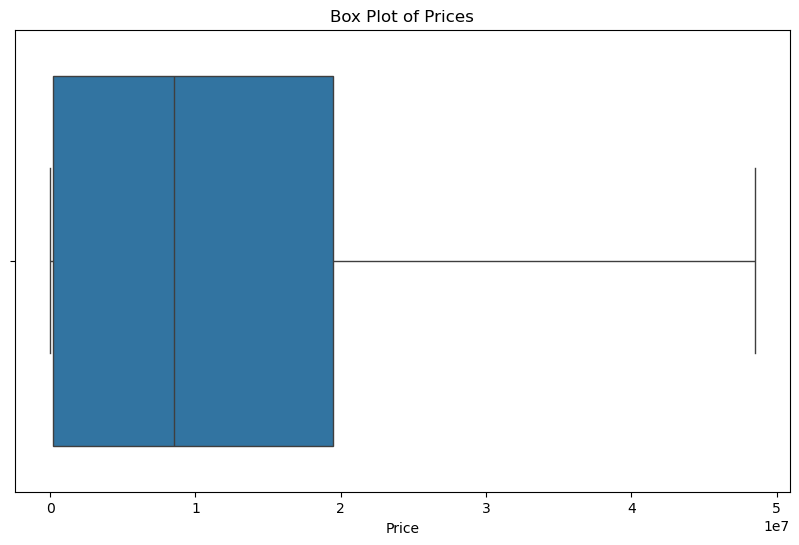

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

In [59]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]


In [60]:
df['price'] = np.where(df['price'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['price'])
df['price'] = np.where(df['price'] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['price'])


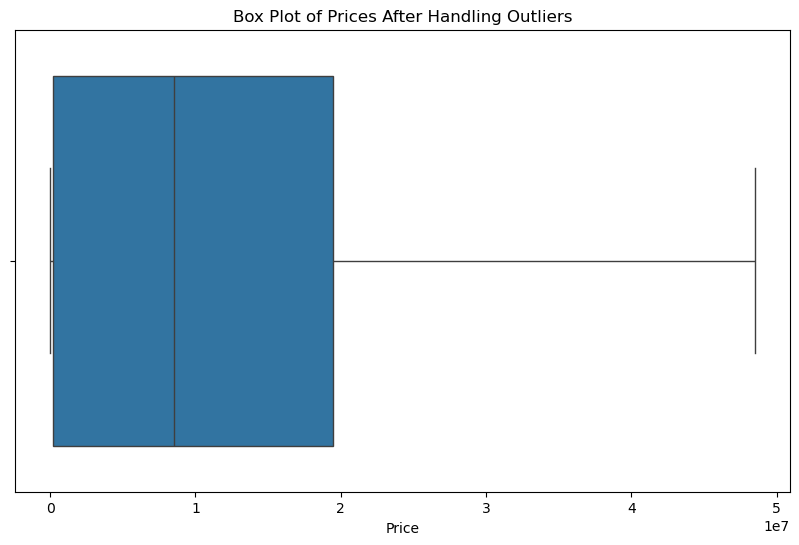

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Prices After Handling Outliers')
plt.xlabel('Price')
plt.show()

In [62]:
#how many rows in price column 
df['price'].shape


(168446,)

# Exploratory Data Analysis (EDA)

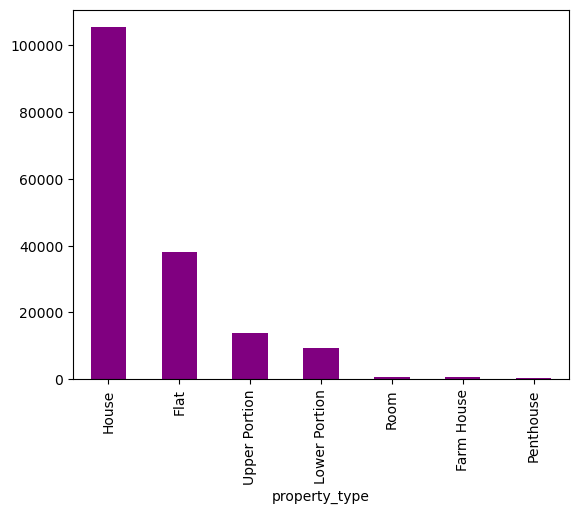

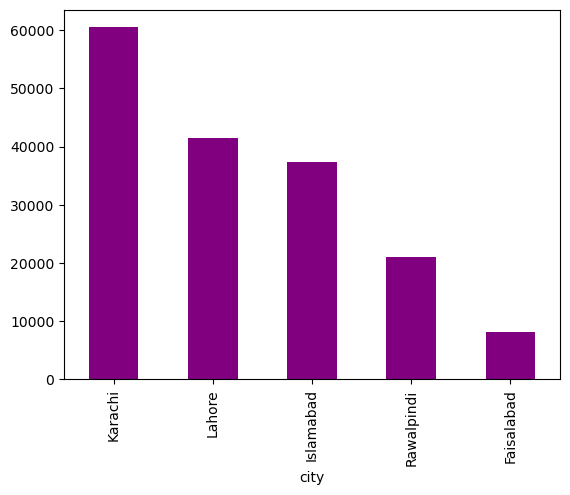

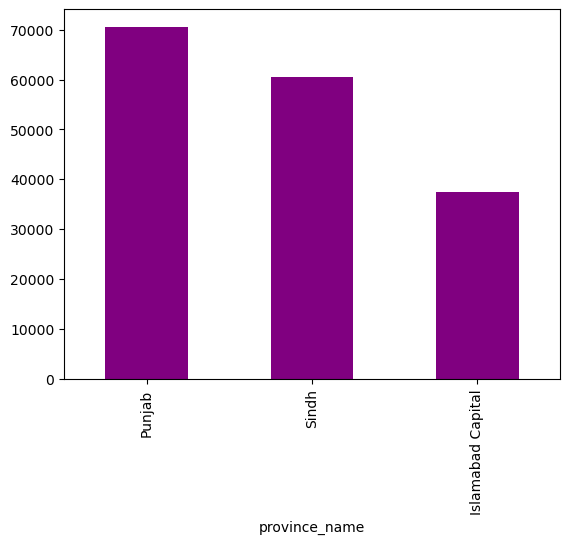

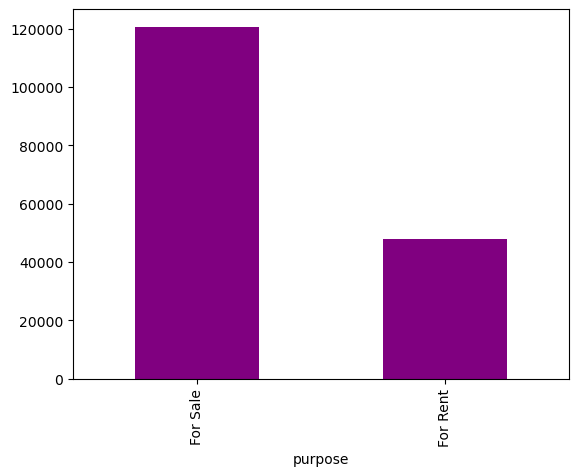

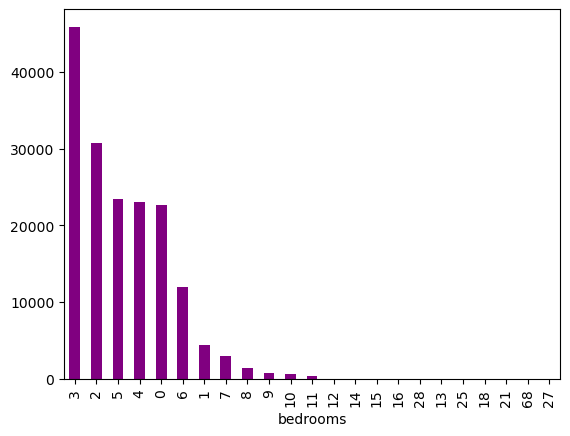

In [63]:
# visualise the count of each category in categorical columns

categorical_features = ['property_type', 'city', 'province_name', 'purpose', 'bedrooms']

for i, cat_feature in enumerate(df[categorical_features]):
    df[cat_feature].value_counts().plot(kind = 'bar', color = 'purple')
    plt.show()

<Axes: xlabel='price', ylabel='property_type'>

<Figure size 1200x800 with 0 Axes>

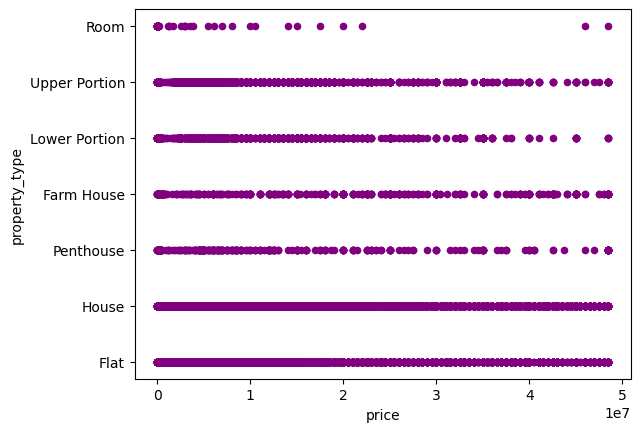

In [64]:
# visualizing price vs property type

fig = plt.figure(figsize = (12, 8))
df.plot.scatter(x = 'price', y = 'property_type', color = 'purple')

In [22]:
# Correlation matrix to check relationships between numerical features
correlation_matrix = df[['price', 'Area Size', 'bedrooms', 'baths']].corr()

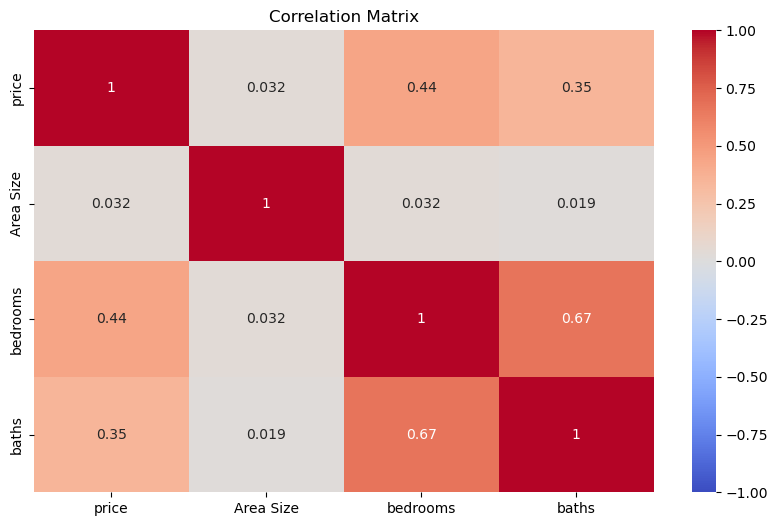

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [67]:
df['Area Size in Marla'] = df.apply(lambda row: row['Area Size'] * 20 if 'Kanal' in row['Area Type'] else row['Area Size'], axis=1)

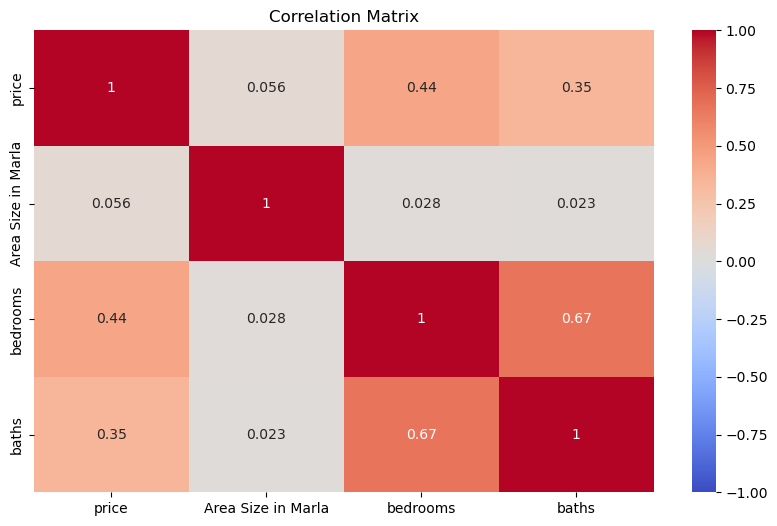

In [32]:
correlation_matrix = df[['price', 'Area Size in Marla', 'bedrooms', 'baths']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [68]:
df.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category', 'Area Size in Marla'],
      dtype='object')

In [77]:
df = df.drop(
    ['property_id','location_id','page_url','location','latitude','longitude','area',
     'date_added','agency','agent'], axis = 1)

In [78]:
df = df.drop(
    ["Area Type"	,"Area Size",	"Area Category"], axis = 1)

In [80]:
df['property_type'] = df['property_type'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['province_name'] = df['province_name'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category').cat.codes

In [81]:
df.head()

,property_type,price,city,province_name,baths,purpose,bedrooms
0,1,10000000,1,0,2,1,2
1,1,6900000,1,0,3,1,3
2,2,16500000,1,0,6,1,5
3,2,43500000,1,0,4,1,4
4,2,7000000,1,0,3,1,3


# Train test split

In [83]:
x = df.drop('price', axis = 1)
y = df['price']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)


# Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
reg_model = LinearRegression()


In [88]:

reg_model.fit(x_train, y_train)


LinearRegression()

In [89]:

LinearRegression()
lin_y_pred = reg_model.predict(x_test)


In [90]:
lr_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : lin_y_pred})
lr_data

,Actual,Predicted
72796,6000000,1.417766e+07
105549,7900000,2.135090e+07
96472,60000,1.396718e+06
85452,4000000,1.946128e+07
153789,38500000,3.698798e+07
...,...,...
116959,12000000,1.927499e+07
71815,8500000,2.798723e+07
148808,27000000,2.636173e+07
98123,6600000,1.888845e+07


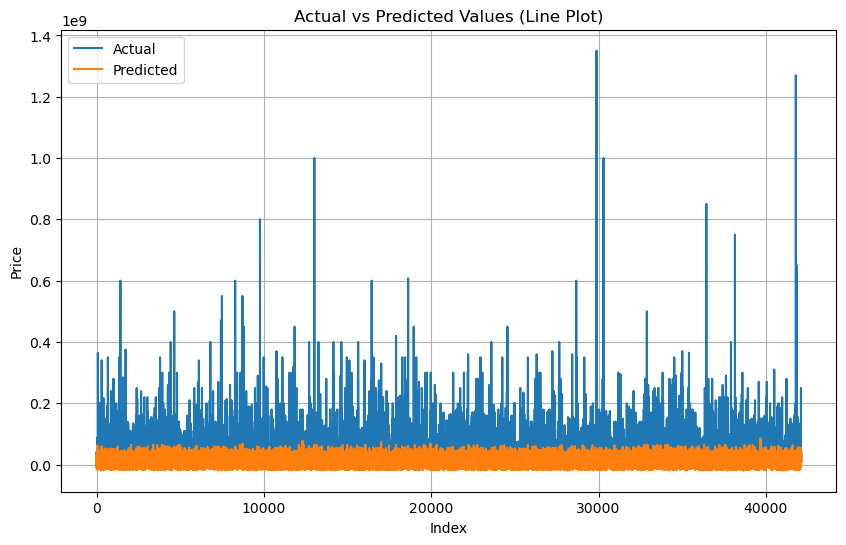

In [93]:
plt.figure(figsize=(10, 6))
lr_data.reset_index(drop=True, inplace=True)
lr_data.plot(ax=plt.gca())
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values (Line Plot)')
plt.grid(True)
plt.savefig('line_plot_actual_vs_predicted.png')
plt.show()

# Random Forest regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor


In [95]:

forest_model = RandomForestRegressor()


In [96]:

forest_model.fit(x_train, y_train)


RandomForestRegressor()

In [97]:

RandomForestRegressor()


RandomForestRegressor()

In [98]:

forest_y_pred = forest_model.predict(x_test)
forest_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : forest_y_pred})
forest_data

,Actual,Predicted
72796,6000000,5.076494e+06
105549,7900000,1.048517e+07
96472,60000,6.043864e+04
85452,4000000,5.605613e+06
153789,38500000,4.792757e+07
...,...,...
116959,12000000,1.497895e+07
71815,8500000,1.289575e+07
148808,27000000,1.885621e+07
98123,6600000,6.481882e+06


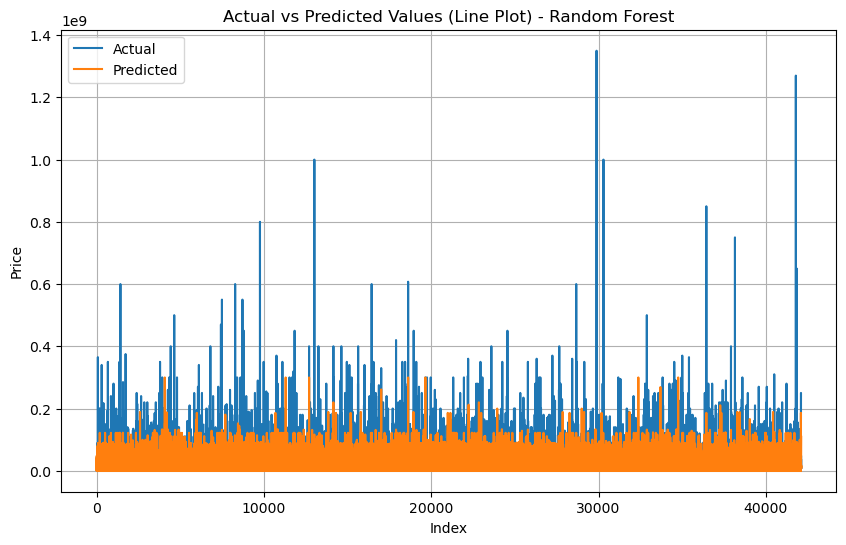

In [99]:
plt.figure(figsize=(10, 6))
forest_data.reset_index(drop=True, inplace=True)
forest_data.plot(ax=plt.gca())
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values (Line Plot) - Random Forest')
plt.grid(True)
plt.savefig('rf_line_plot_actual_vs_predicted.png')
plt.show()